In [1]:
# Pandas for managing datasets
import pandas as pd
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns
import os
from tools.data_extraction import DataExtractor
from tools.trajectory_generator import TrajectoryGenerator
from tools.utils import standardize_data, print_genetic_param, print_settings, set_movements, angle_diff

In [2]:
tr_gen_options = {"samples": 25,
                  "freq": 3,
                  "reset_data": True}
dt_gen_options = {"n_test": 10}

train_test_options = {"split": 25}

df_csv_options = {"ts_class": "Bearing"}


first_movement = ['sector_pattern_left']
second_movement = ['random']
movements = {'first_movement': first_movement,'second_movement': second_movement}
set_movements(movements)


# Create files if not created
tr_gen = TrajectoryGenerator(**tr_gen_options)
tr_gen.data_generation(**dt_gen_options)


Create directory 'data' 
now creating data for movement: sector_pattern_left
now creating data for movement: random
Done with generator


/home/kapadais/anaconda3/envs/gendis_test/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


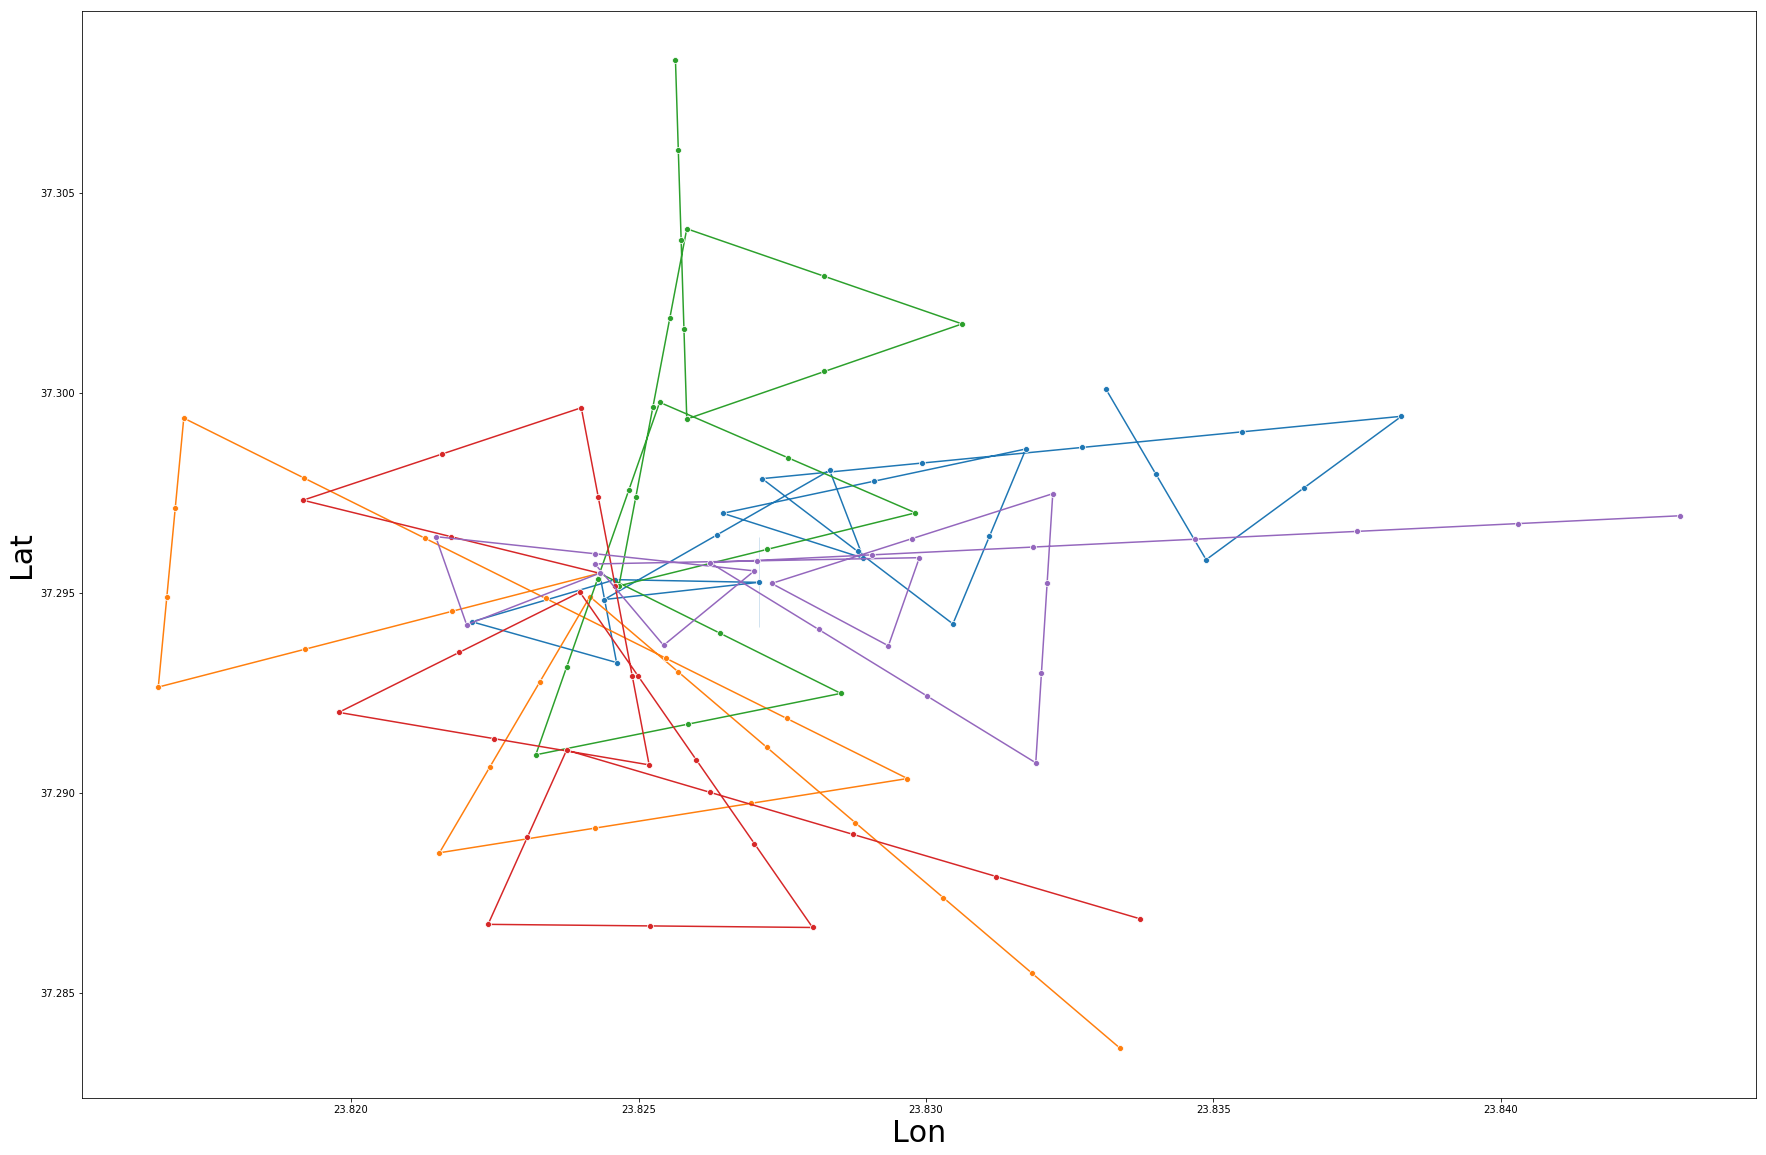

In [3]:
#for multiple trajectory plotting 
i =0
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)
ax.set_ylabel('Latitute', fontsize = 30.0) # Y label
ax.set_xlabel('Longitude ', fontsize = 30.0) # X label
while i<5:
    file = "data/first_movement_0_"+first_movement[0]+"_"+str(i)+"_2015-02-01.csv"
    df =  pd.read_csv(file)
    i=i+1
    # Plot using Seaborn
    sns.lineplot(x='Lon', y='Lat', data=df, ax=ax,sort=False,marker="o")


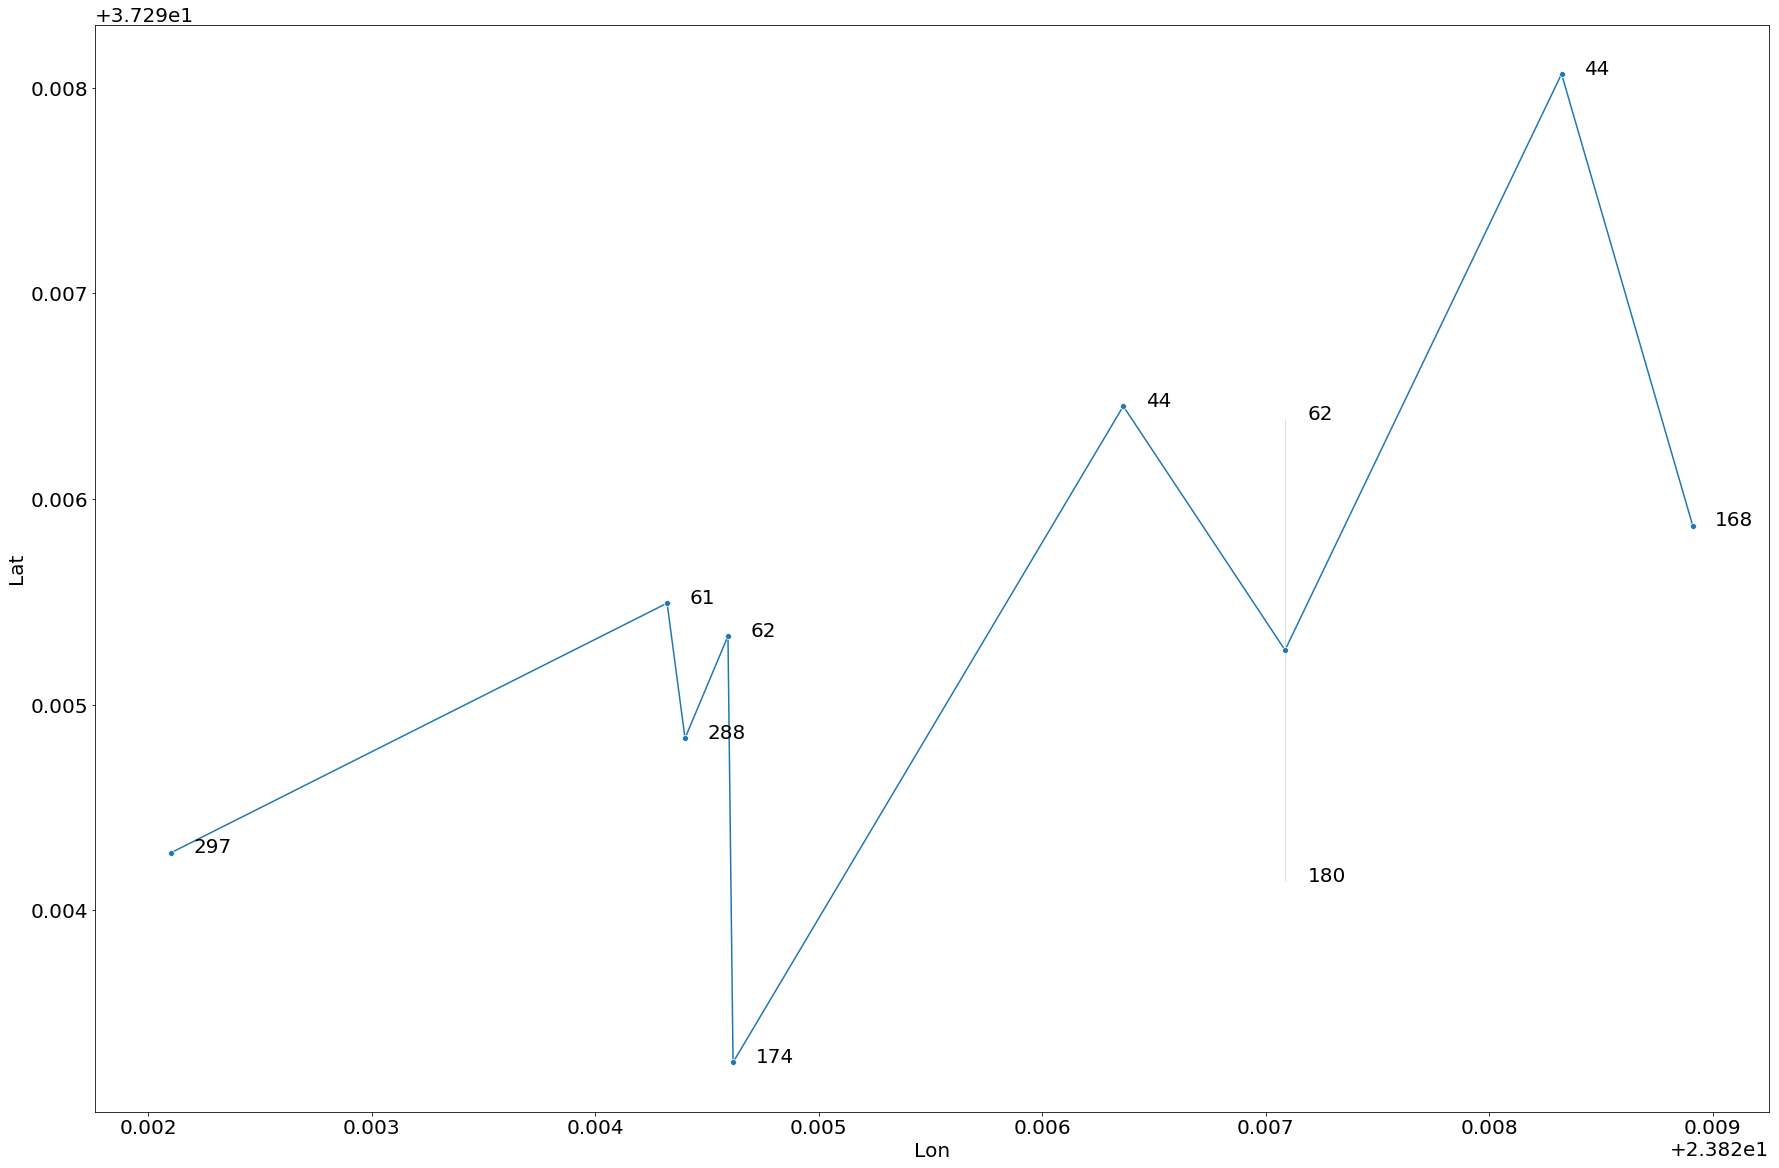

In [6]:
#for single trajectory plotting 
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)
plt.rcParams.update({'font.size': 20})
file = "data/first_movement_0_"+first_movement[0]+"_0_2015-02-01.csv"
df =  pd.read_csv(file)[:10]
# Plot using Seaborn
sns.lineplot(x='Lon', y='Lat', data=df, ax=ax,sort=False,marker="o")
for i, point in df.iterrows():
    ax.text(point['Lon']+0.0001, point['Lat'], str(point['Bearing']))            
